In [3]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Import MlFinLab tools
from mlfinlab.labeling import excess_over_median

In [4]:
# Load price data for 22 stocks
tickers = "AAPL MSFT COST PFE SYY F GE BABA AMD CCL ZM FB WFC JPM NVDA CVX AAL UBER C UA VZ NOK"

data = yf.download(tickers, start="2019-01-20", end="2020-05-25",
                   group_by="ticker")
data = data.loc[:, (slice(None), 'Adj Close')]
data.columns = data.columns.droplevel(1)
data.head()

[*********************100%***********************]  22 of 22 completed


,COST,F,AAL,ZM,FB,C,JPM,CVX,MSFT,UBER,...,CCL,NOK,AAPL,SYY,GE,BABA,AMD,WFC,NVDA,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,201.700134,7.837517,32.219025,NaN,147.570007,56.094559,94.728691,98.198845,102.378883,NaN,...,51.750244,5.846642,37.205048,58.341270,65.863937,152.149994,19.760000,45.463181,36.959026,50.636238
2019-01-23,201.405777,7.689988,31.146364,NaN,144.300003,56.348507,94.489426,97.368416,103.376701,NaN,...,51.512947,5.924989,37.355518,58.555424,66.396339,152.029999,19.799999,45.700253,37.088207,51.320396
2019-01-24,199.715439,7.929725,33.124378,NaN,145.830002,56.874535,94.544640,99.221558,102.882622,NaN,...,52.224846,6.032715,37.059429,58.220230,66.776604,155.860001,20.850000,45.572598,39.212292,50.707321
2019-01-25,198.537918,8.169459,34.423378,NaN,149.009995,58.062630,95.142807,98.968063,103.822319,NaN,...,52.689949,6.463624,38.287460,57.745384,69.666718,159.210007,21.930000,45.709377,39.786175,50.112026
2019-01-28,200.152267,7.985046,35.988075,NaN,147.470001,57.908443,95.593712,98.050240,101.797638,NaN,...,53.534737,6.355897,37.933125,57.978153,67.917427,158.919998,20.180000,45.426712,34.285912,48.930294


In [5]:
excess1 = excess_over_median(prices=data, lag=False)
excess1.head()

,COST,F,AAL,ZM,FB,C,JPM,CVX,MSFT,UBER,...,CCL,NOK,AAPL,SYY,GE,BABA,AMD,WFC,NVDA,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-23,-0.002077,-0.019441,-0.033911,NaN,-0.022777,0.003909,-0.003144,-0.009074,0.009129,NaN,...,-0.005203,0.012783,0.003427,0.003053,0.007466,-0.001406,0.001406,0.004597,0.002877,0.012893
2019-01-24,-0.018362,0.021206,0.053538,NaN,0.000634,-0.000634,-0.009385,0.009063,-0.014748,NaN,...,0.003851,0.008213,-0.017895,-0.015693,-0.004242,0.015223,0.043061,-0.012762,0.047302,-0.021915
2019-01-25,-0.023659,0.012470,0.021453,NaN,0.004044,0.003127,-0.011436,-0.020317,-0.008629,NaN,...,-0.008857,0.053666,0.015374,-0.025919,0.025518,0.003731,0.034036,-0.014761,-0.003127,-0.029502
2019-01-28,0.017395,-0.013309,0.054719,NaN,-0.001071,0.006609,0.014004,-0.000010,-0.010237,NaN,...,0.025297,-0.007402,0.000010,0.013295,-0.015845,0.007443,-0.070535,0.003080,-0.128981,-0.014318


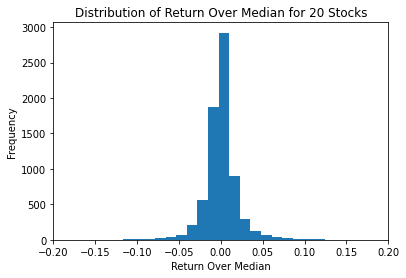

In [6]:
s2 = pd.Series(excess1.values.flatten())
ax2 = s2.plot.hist(bins=50)
ax2.set_xlim(-0.2,0.2)
ax2.set_xlabel('Return Over Median')
ax2.set_title('Distribution of Return Over Median for 20 Stocks');

In [7]:
excess2 = excess_over_median(prices=data, binary=True)
excess2.head()

,COST,F,AAL,ZM,FB,C,JPM,CVX,MSFT,UBER,...,CCL,NOK,AAPL,SYY,GE,BABA,AMD,WFC,NVDA,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-22,-1.0,-1.0,-1.0,NaN,-1.0,1.0,-1.0,-1.0,1.0,NaN,...,-1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0
2019-01-23,-1.0,1.0,1.0,NaN,1.0,-1.0,-1.0,1.0,-1.0,NaN,...,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
2019-01-24,-1.0,1.0,1.0,NaN,1.0,1.0,-1.0,-1.0,-1.0,NaN,...,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
2019-01-25,1.0,-1.0,1.0,NaN,-1.0,1.0,1.0,-1.0,-1.0,NaN,...,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
2019-01-28,1.0,1.0,-1.0,NaN,-1.0,-1.0,1.0,1.0,-1.0,NaN,...,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [8]:
excess2.stack().value_counts()

-1.0    3630
 1.0    3629
 0.0      18
dtype: int64

In [9]:
monthly_forward = excess_over_median(prices=data, binary=True, resample_by='M', lag=True)
monthly_forward.head()

,COST,F,AAL,ZM,FB,C,JPM,CVX,MSFT,UBER,...,CCL,NOK,AAPL,SYY,GE,BABA,AMD,WFC,NVDA,VZ
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-31,1.0,-1.0,-1.0,NaN,-1.0,-1.0,-1.0,1.0,1.0,NaN,...,-1.0,-1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0
2019-02-28,1.0,1.0,-1.0,NaN,1.0,-1.0,-1.0,1.0,1.0,NaN,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0
2019-03-31,-1.0,1.0,1.0,NaN,1.0,1.0,1.0,-1.0,1.0,NaN,...,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2019-04-30,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,NaN,...,0.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2019-05-31,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0


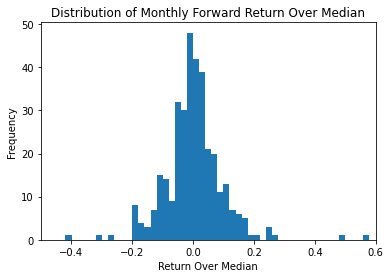

In [10]:
excess3 = excess_over_median(prices=data, binary=False, resample_by='M', lag=True)

s = pd.Series(excess3.values.flatten())
ax = s.plot.hist(bins=50)
ax.set_xlim(-0.5,0.6)
ax.set_xlabel('Return Over Median')
ax.set_title('Distribution of Monthly Forward Return Over Median');